It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/First_Model.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# First Neural Network

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !conda install -c conda-forge tensorflow

# Preprocessing Data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# load data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


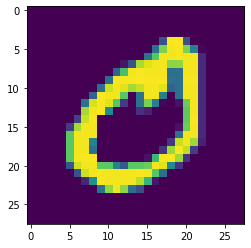

In [6]:
# Image example
plt.imshow(train_images[21])
plt.show()

# NN Keras model

In [7]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


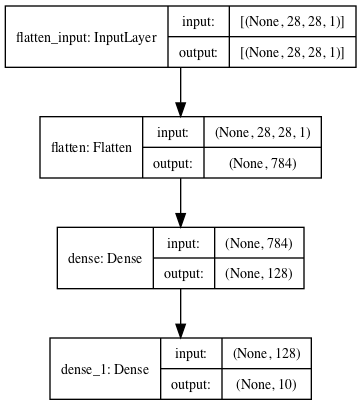

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
n_epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=128, epochs=n_epochs, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.0652 - accuracy: 0.7602 - val_loss: 0.3276 - val_accuracy: 0.9128
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.9122 - val_loss: 0.2512 - val_accuracy: 0.9306
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.9291 - val_loss: 0.2188 - val_accuracy: 0.9385
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2083 - accuracy: 0.9403 - val_loss: 0.1919 - val_accuracy: 0.9473
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1896 - accuracy: 0.9451 - val_loss: 0.1773 - val_accuracy: 0.9507
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1639 - accuracy: 0.9530 - val_loss: 0.1600 - val_accuracy: 0.9555
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1401 - accuracy: 0.9598 - val_loss: 0.1491 - val_accuracy: 0.9593
Epoch 

## Evaluating the model

In [10]:
import pandas as pd
def show_loss_accuracy_evolution(hist):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1185273826122284
Test accuracy: 0.9648000001907349


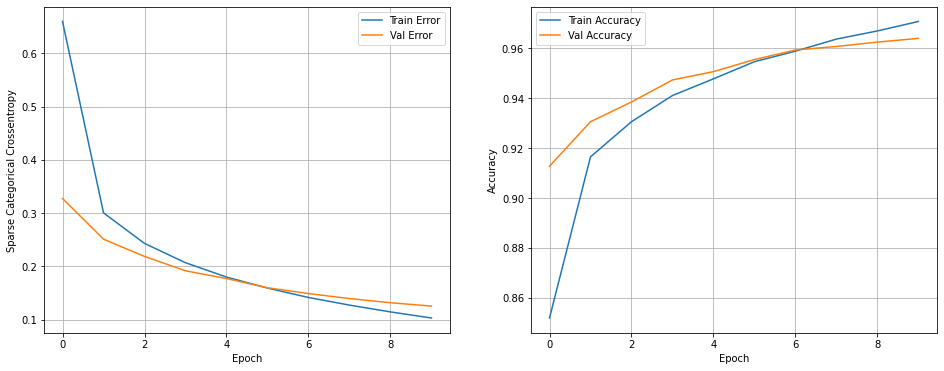

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
show_loss_accuracy_evolution(hist)